In [2]:
import json
import pandas as pd

In [3]:
# Load benchmark details
with open('../data/benchmark.json') as stream:
    benchmark = json.loads(stream.read())

In [34]:
# Load benchmark results

with open('T4_openmm8.1.2_md_benchmark.out') as stream:
    t4_data = json.loads(stream.read())

with open('L4_openmm8.1.2_md_benchmark.out') as stream:
    l4_data = json.loads(stream.read())

with open('A10G_openmm8.1.2_md_benchmark.out') as stream:
    A10G_data = json.loads(stream.read())

with open('L40S_openmm8.1.2_md_benchmark.out') as stream:
    l40_data = json.loads(stream.read())

with open('A30_openmm8.1.2_md_benchmark.out') as stream:
    A30_data = json.loads(stream.read())

with open('A100_openmm8.1.2_md_benchmark.out') as stream:
    A100_data = json.loads(stream.read())

In [35]:
plot_data = {
    'systems': [f"{sys} ({benchmark[sys]["atoms"]} atoms)" for sys in benchmark],
    'atoms': [benchmark[sys]['atoms'] for sys in benchmark],
    'T4': t4_data.values(),
    'L4': l4_data.values(),
    'A10G': A10G_data.values(),
    'A30': A30_data.values(),
    'L40S': l40_data.values(),
    'A100': A100_data.values(),
}
df = pd.DataFrame(plot_data)
df.sort_values('atoms', inplace=True)

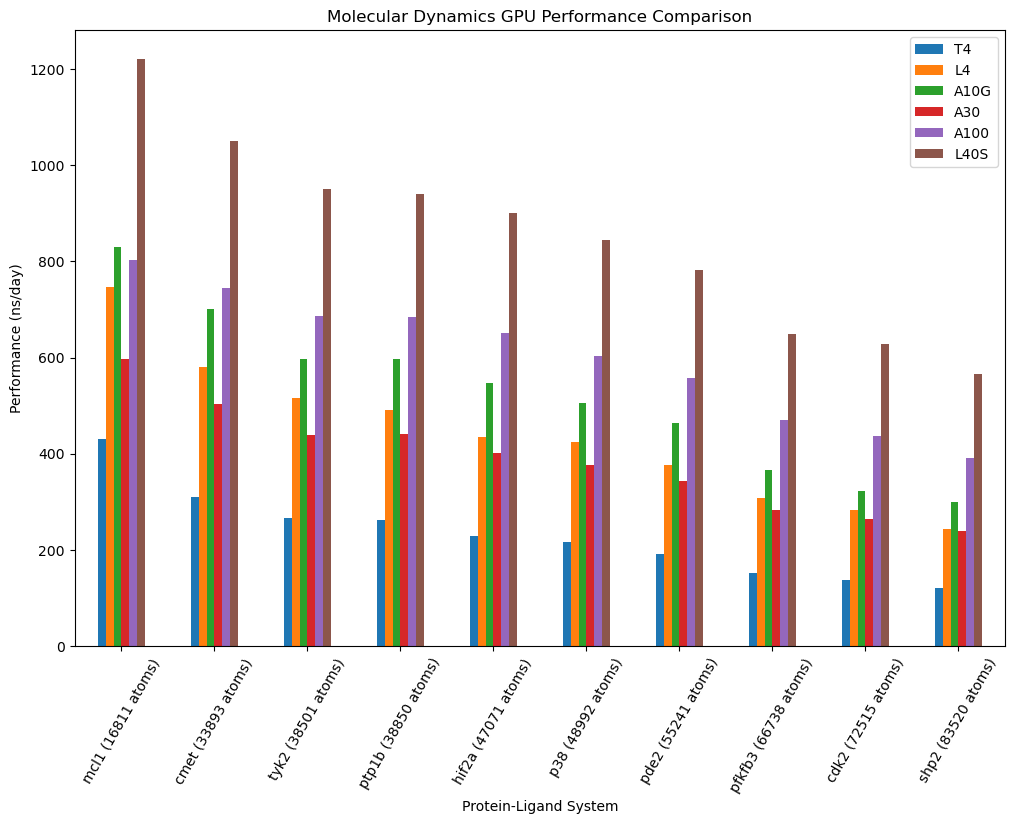

In [36]:
import matplotlib.pyplot as plt

ax = df.plot(x='systems', y=['T4', 'L4', 'A10G', 'A30', 'A100', 'L40S'], kind='bar', figsize=(12,8))
ax.set_xticklabels(df['systems'], rotation=60)
plt.title('Molecular Dynamics GPU Performance Comparison')
plt.xlabel('Protein-Ligand System')
plt.ylabel('Performance (ns/day)')
plt.savefig('openmm_md_benchmark.png', bbox_inches="tight")

In [37]:
# Cost per nanosecond
import numpy as np

cost_per_ns = {
    'systems': [f"{sys} ({benchmark[sys]["atoms"]} atoms)" for sys in benchmark],
    'atoms': [benchmark[sys]['atoms'] for sys in benchmark],
    'T4': np.array(list(t4_data.values())) / 24 / 0.526,
    'L4': np.array(list(l4_data.values())) / 24 / 0.8048,
    'A10G': np.array(list(A10G_data.values())) / 24 / 1.006,
    'L40S': np.array(list(l40_data.values())) / 24 / 1.861,
    'A100': np.array(list(A100_data.values())) / 24 / (32.7726/8),
}
df = pd.DataFrame(cost_per_ns)
df.sort_values('atoms', inplace=True)
df

,systems,atoms,T4,L4,A10G,L40S,A100
6,mcl1 (16811 atoms),16811,34.141318,38.622432,34.335653,27.315064,8.167392
5,cmet (33893 atoms),33893,24.477186,30.028164,29.034129,23.508866,7.577468
0,tyk2 (38501 atoms),38501,21.070976,26.662939,24.685222,21.269927,6.987544
7,ptp1b (38850 atoms),38850,20.833333,25.420394,24.685222,21.068422,6.967202
3,hif2a (47071 atoms),47071,18.140051,22.521123,22.697150,20.150457,6.631556
1,p38 (48992 atoms),48992,17.110266,22.003396,20.916170,18.896651,6.143343
9,pde2 (55241 atoms),55241,15.129911,19.466534,19.176607,17.530897,5.675473
4,pfkfb3 (66738 atoms),66738,12.119772,15.945991,15.159046,14.508329,4.790587
8,cdk2 (72515 atoms),72515,10.931559,14.599901,13.378065,14.060541,4.444770
2,shp2 (83520 atoms),83520,9.584918,12.632538,12.384029,12.650009,3.987070


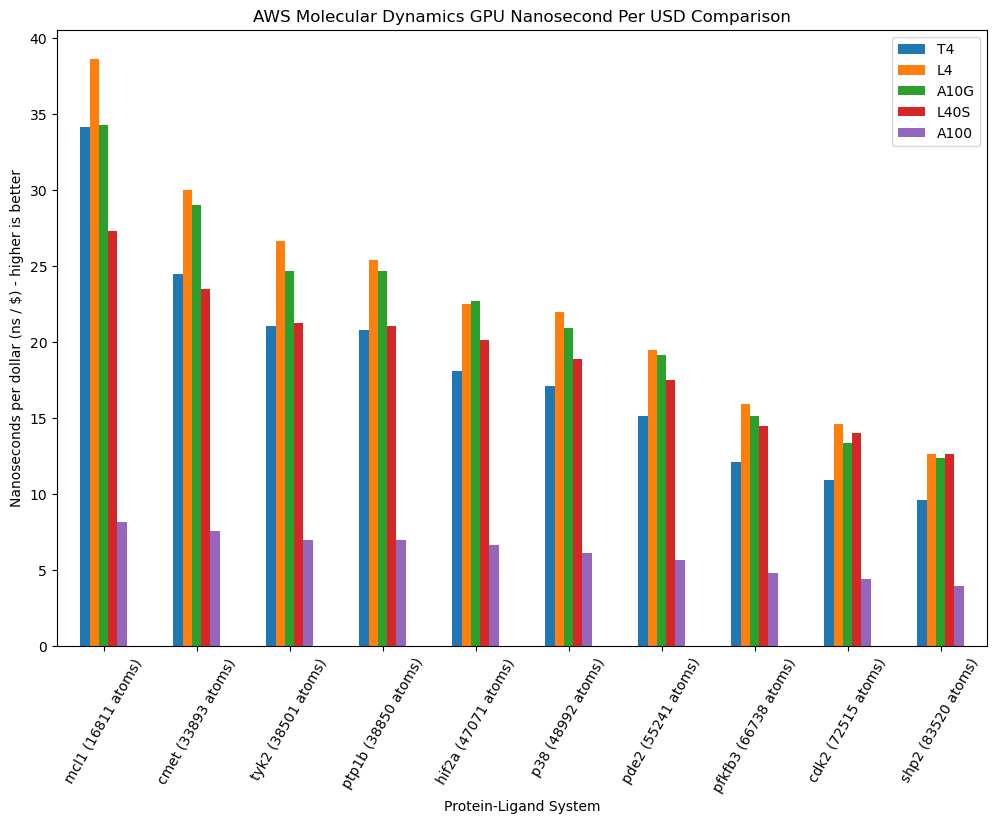

In [39]:
import matplotlib.pyplot as plt

ax = df.plot(x='systems', y=['T4', 'L4', 'A10G', 'L40S', 'A100'], kind='bar', figsize=(12,8))
ax.set_xticklabels(df['systems'], rotation=60)
plt.title('AWS Molecular Dynamics GPU Nanosecond Per USD Comparison')
plt.xlabel('Protein-Ligand System')
plt.ylabel('Nanoseconds per dollar (ns / $) - higher is better')
plt
plt.savefig('openmm_md_benchmark_costs.png', bbox_inches="tight")